# Lending club loan project

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Description file

In [363]:
data_info=pd.read_csv("D://TensorFlow_FILES/DATA/lending_club_info.csv", index_col='LoanStatNew')
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [364]:
data_info.loc['term']['Description']

'The number of payments on the loan. Values are in months and can be either 36 or 60.'

In [365]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [366]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


## Actual dataset

In [367]:
data=pd.read_csv("D://TensorFlow_FILES/DATA/lending_club_loan_two.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [368]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [369]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [370]:
data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

## Exploratory data analysis

### loan status


In [371]:
data['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

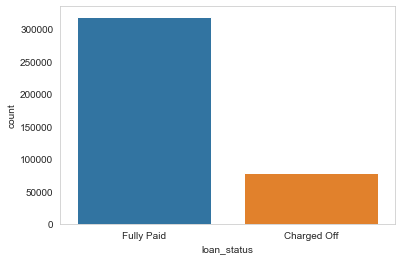

In [372]:
sns.set_style("whitegrid", {"axes.grid":False})

sns.countplot(x='loan_status', data=data)

### loan amount

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

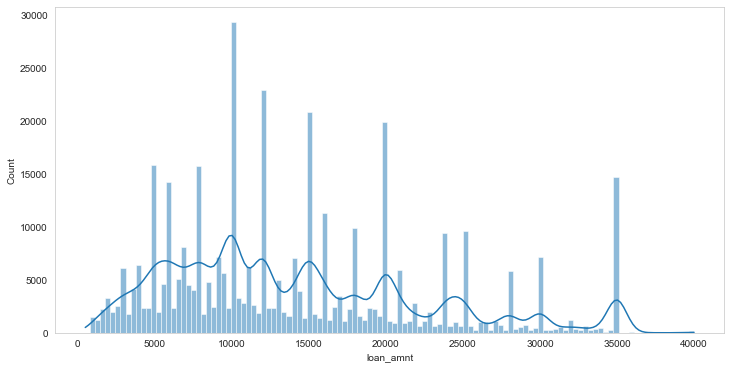

In [373]:
plt.figure(figsize=(12,6))
sns.histplot(data['loan_amnt'], kde=True)

### correlation

In [374]:
data.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

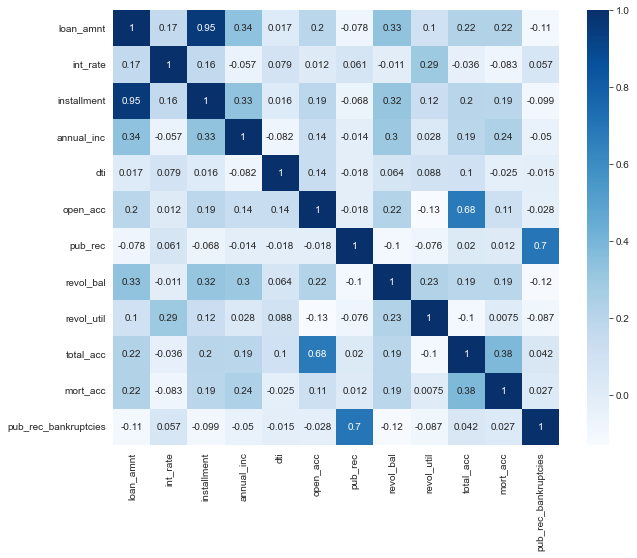

In [375]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='Blues', annot=True)

In [376]:
#There is 0.95 correlation between "installments" and "loan amount"

feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [377]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

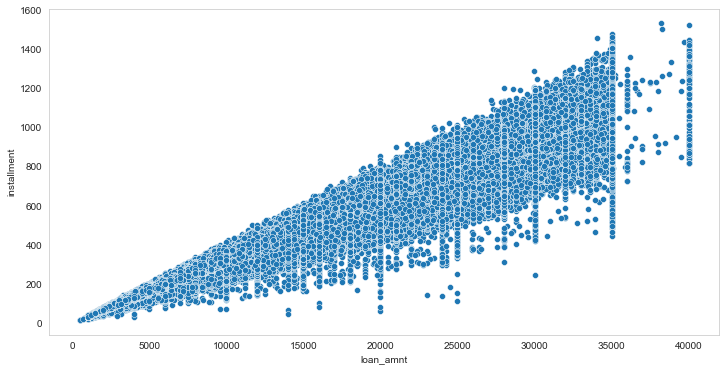

In [378]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='loan_amnt', y='installment', data=data)

### loan status and loan amount

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

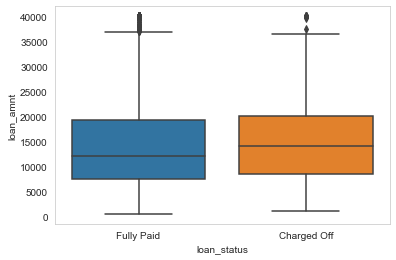

In [379]:
sns.boxplot(x='loan_status', y='loan_amnt', data=data)


In [380]:
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


### grades and sub-grades

In [381]:
data['grade'].value_counts().sort_index()

A     64187
B    116018
C    105987
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [382]:
data['sub_grade'].value_counts().sort_index()

A1     9729
A2     9567
A3    10576
A4    15789
A5    18526
B1    19182
B2    22495
B3    26655
B4    25601
B5    22085
C1    23662
C2    22580
C3    21221
C4    20280
C5    18244
D1    15993
D2    13951
D3    12223
D4    11657
D5     9700
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

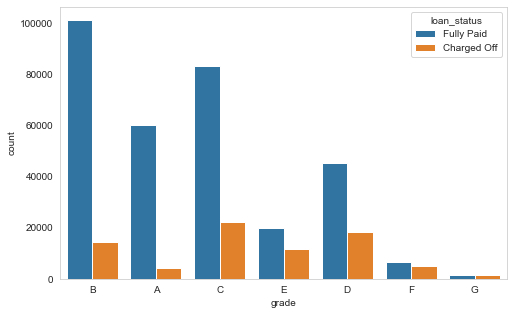

In [383]:
plt.figure(figsize=(8,5))
sns.countplot(x='grade', hue='loan_status', data=data)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

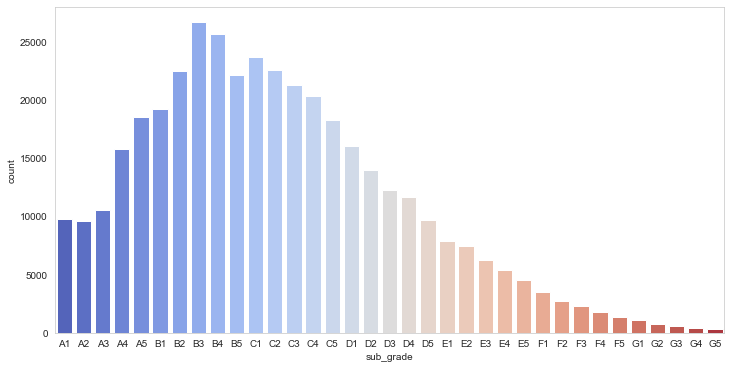

In [384]:
plt.figure(figsize=(12,6))
subgrade_order=sorted(data['sub_grade'].unique())
sns.countplot(x='sub_grade', data=data, order=subgrade_order, palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

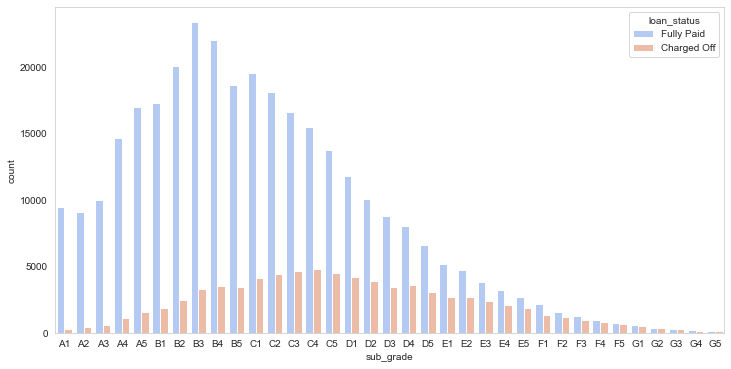

In [385]:
plt.figure(figsize=(12,6))
subgrade_order=sorted(data['sub_grade'].unique())
sns.countplot(x='sub_grade',hue='loan_status', data=data, order=subgrade_order, palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

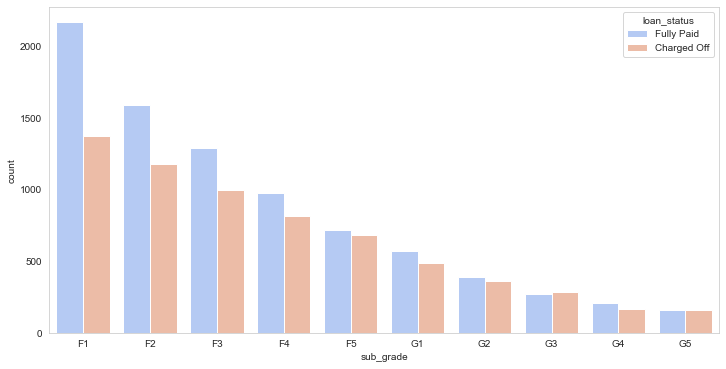

In [386]:
#F and G sub-grades do not seem to pay their loans back
plt.figure(figsize=(12,6))
fg=data[((data['grade']=='F')| (data['grade']=='G'))]
fg_order=sorted(fg['sub_grade'].unique())

sns.countplot(x='sub_grade', data=fg, hue='loan_status', order=fg_order, palette='coolwarm')


### loan repaid

In [387]:
data['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [388]:
# put 1 if loan_status='fully paid' and 0 if loan_status ='charged off'

data.loc[data['loan_status']=='Fully Paid', 'loan_status']=1
data.loc[data['loan_status']=='Charged Off', 'loan_status']=0

In [389]:
data['loan_status'].value_counts()

1    318357
0     77673
Name: loan_status, dtype: int64

In [390]:
#data['loan_repaid']= data['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
#data['loan_repaid']
data['loan_repaid']=data['loan_status']
data['loan_repaid'].value_counts()

1    318357
0     77673
Name: loan_repaid, dtype: int64

### correlation with 'loan repaid' column

In [391]:
data['loan_repaid'].dtype

dtype('O')

In [392]:
data['loan_repaid']=pd.to_numeric(data['loan_repaid'])

In [393]:
data['loan_repaid'].dtype

dtype('int64')

In [394]:
data.corr()['loan_repaid'].sort_values()

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

<AxesSubplot:>

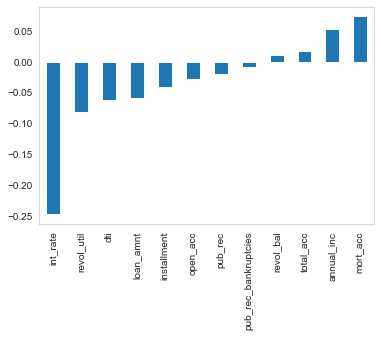

In [395]:
data.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar')

## Data pre-processing

In [396]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [397]:
data.shape
len(data)

396030

In [398]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [399]:
len(data.isna().sum())
    

28

In [400]:
def perc(col,data):
    return (col/len(data))*100

data.isna().sum().apply(lambda x : perc(x,data))

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

#### emp_title and emp_length are around 5% in null values

In [401]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [402]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [403]:
data['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [404]:
len(data['emp_title'].unique())

173106

In [405]:
data['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [406]:
#Drop the emp_title column
data.drop('emp_title', inplace=True, axis=1)

In [407]:
data['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [408]:
data['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

<AxesSubplot:xlabel='emp_length', ylabel='count'>

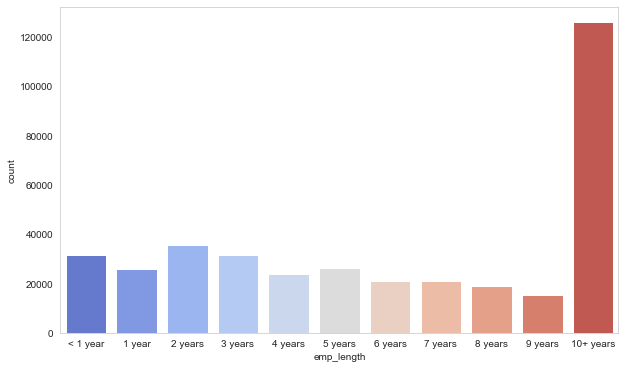

In [409]:
plt.figure(figsize=(10,6))
el_order=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years',]
sns.countplot(x='emp_length', data=data, palette='coolwarm', order=el_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

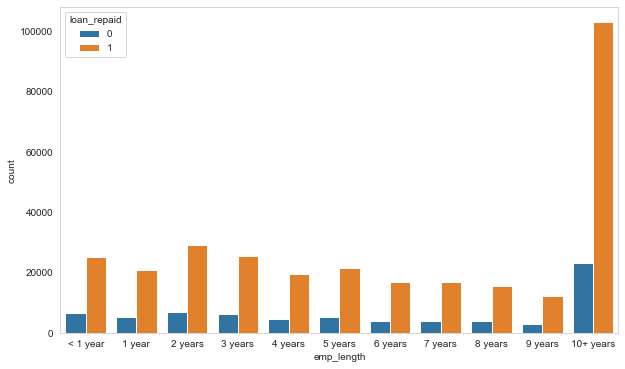

In [410]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length',hue='loan_repaid', data=data,  order=el_order)

In [411]:
data[data['loan_repaid']==0]['emp_length'].value_counts()

10+ years    23215
2 years       6924
< 1 year      6563
3 years       6182
1 year        5154
5 years       5092
4 years       4608
7 years       4055
6 years       3943
8 years       3829
9 years       3070
Name: emp_length, dtype: int64

In [412]:
def perc_el(col,data):
    return (col/len(data))*100

data[data['loan_repaid']==0]['emp_length'].value_counts().apply(lambda x : perc_el(x,data))

10+ years    5.861930
2 years      1.748352
< 1 year     1.657198
3 years      1.560993
1 year       1.301417
5 years      1.285761
4 years      1.163548
7 years      1.023912
6 years      0.995632
8 years      0.966846
9 years      0.775194
Name: emp_length, dtype: float64

In [413]:
emp_charged = data[data['loan_repaid']==0]['emp_length'].value_counts()
emp_paid =data[data['loan_repaid']==1]['emp_length'].value_counts()

In [414]:
emp_len= (emp_charged/emp_paid)*100
emp_len

1 year       24.864917
10+ years    22.576975
2 years      23.955991
3 years      24.259310
4 years      23.821340
5 years      23.791057
6 years      23.334122
7 years      24.188738
8 years      24.962514
9 years      25.073505
< 1 year     26.082982
Name: emp_length, dtype: float64

<AxesSubplot:>

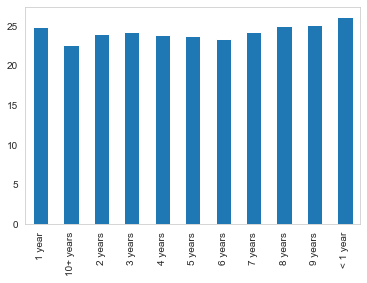

In [415]:
emp_len.plot(kind='bar')

In [416]:
# drop the emp_length column

data.drop('emp_length', axis=1, inplace=True)

In [417]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

### check the title and purpose column

In [418]:
data['title'].unique()[:10]

array(['Vacation', 'Debt consolidation', 'Credit card refinancing',
       'Credit Card Refinance', 'Home improvement',
       'No More Credit Cards', 'Debt Consolidation', 'Business',
       'Major purchase', 'Debt Consolidation/Home Repairs'], dtype=object)

In [419]:
data['purpose'].unique()[:10]

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car'], dtype=object)

In [420]:
# As they both look identical, drop the title column

data.drop('title', axis=1, inplace=True)

### mortgage accounts

In [421]:
feat_info('mort_acc')

Number of mortgage accounts.


In [422]:
data['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [423]:
data.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [424]:
# mean of mortgage account per total account
data.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [425]:
data[['mort_acc','total_acc']]

,mort_acc,total_acc
0,0.0,25.0
1,3.0,27.0
2,0.0,26.0
3,0.0,13.0
4,1.0,43.0
...,...,...
396025,0.0,23.0
396026,1.0,8.0
396027,0.0,23.0
396028,5.0,20.0


In [426]:
total_acc_avg= data.groupby('total_acc').mean()['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [427]:
def fill(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

data['mort_acc']=data.apply(lambda x : fill(x['total_acc'],x['mort_acc']),axis=1)

In [428]:
data.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [429]:
# remove the rows of revol_util and pub_rec

data.drop(['revol_util', 'pub_rec_bankruptcies'], axis=1, inplace=True)

In [430]:
data.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
loan_repaid            0
dtype: int64

## Categorical and Numerical variables

In [431]:
data.dtypes

loan_amnt              float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
earliest_cr_line        object
open_acc               float64
pub_rec                float64
revol_bal              float64
total_acc              float64
initial_list_status     object
application_type        object
mort_acc               float64
address                 object
loan_repaid              int64
dtype: object

In [432]:
cat_cols= data.select_dtypes(include=['object']).columns
cat_cols

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### term column

In [433]:
data['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [434]:
data['term']=data['term'].apply(lambda x : int(x[:3]))

In [435]:
data['term'].value_counts()

36    302005
60     94025
Name: term, dtype: int64

### sub_grade and grade

In [436]:
#As grade is a part of sub_grade, drop the grade column

data.drop('grade', axis=1, inplace=True)

In [437]:
sub_grade_df=pd.get_dummies(data['sub_grade'], drop_first=True)

In [438]:
data= pd.concat([data.drop('sub_grade', axis=1),sub_grade_df], axis=1)

In [439]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'address', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [440]:
data.select_dtypes(include=['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### dummy variables encoding

In [442]:
dummy_df2= pd.get_dummies( data[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)

In [443]:
data=data.drop( ['verification_status', 'application_type','initial_list_status','purpose'], axis=1)
data= pd.concat([dummy_df2, data], axis=1)

In [444]:
data.columns

Index(['verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'loan_amnt', 'term', 'int_rate',
       'installment', 'home_ownership', 'annual_inc', 'issue_d', 'loan_status',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'mort_acc', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [445]:
data.head()

,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### home ownership column

In [446]:
data['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [447]:
# convert "ANY" & "NONE" to "OTHER" in the column

data['home_ownership']=data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(data['home_ownership'],drop_first=True)
data = data.drop('home_ownership',axis=1)
data = pd.concat([data,dummies],axis=1)

In [448]:
data.isna().sum()

verification_status_Source Verified    0
verification_status_Verified           0
application_type_INDIVIDUAL            0
application_type_JOINT                 0
initial_list_status_w                  0
                                      ..
G4                                     0
G5                                     0
OTHER                                  0
OWN                                    0
RENT                                   0
Length: 71, dtype: int64

### zipcode from the address column

In [449]:
data['address'][1]

'1076 Carney Fort Apt. 347\nLoganmouth, SD 05113'

In [450]:
data['zipcode']= data['address'].apply(lambda x : x[-5:])

In [451]:
data['zipcode'].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: zipcode, dtype: int64

In [452]:
dummies_zip = pd.get_dummies(data['zipcode'], drop_first=True)

data=data.drop(['address','zipcode'], axis=1)
data= pd.concat([data, dummies_zip], axis=1)

### issue date

In [453]:
data['issue_d'].value_counts()

Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
            ...  
Jul-2007       26
Sep-2008       25
Nov-2007       22
Sep-2007       15
Jun-2007        1
Name: issue_d, Length: 115, dtype: int64

In [454]:
# issue date depends on whether the loan was given or not, so drop it
data.drop('issue_d', axis=1, inplace=True)

### earliest_cr_time

In [457]:
data['earliest_cr_line'][0]

'Jun-1990'

In [459]:
data['earliest_cr_year']= data['earliest_cr_line'].apply(lambda x : int(x[-4:]))

In [460]:
data['earliest_cr_year'][0]

1990

In [461]:
data['earliest_cr_year'].dtype

dtype('int64')

In [462]:
data.drop('earliest_cr_line', axis=1, inplace=True)

In [463]:
data.select_dtypes(include=['object']).columns

Index(['loan_status'], dtype='object')

In [232]:
#data.drop('address', axis=1, inplace=True)

In [464]:
data.head()

,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1990
1,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,2004
2,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2007
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2006
4,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1999


## Fitting the model

In [465]:
data.isna().sum()

verification_status_Source Verified    0
verification_status_Verified           0
application_type_INDIVIDUAL            0
application_type_JOINT                 0
initial_list_status_w                  0
                                      ..
48052                                  0
70466                                  0
86630                                  0
93700                                  0
earliest_cr_year                       0
Length: 78, dtype: int64

In [467]:
data=data.drop('loan_status', axis=1)

In [470]:
data['loan_repaid']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 396030, dtype: int64

In [471]:
from sklearn.model_selection import train_test_split

x=data.drop('loan_repaid', axis=1).values

#x = np.asarray(x).astype(np.float32)
                         
y=data['loan_repaid'].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [472]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [473]:
x_train

array([[0.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.75362319],
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.5942029 ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.75362319],
       ...,
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.8115942 ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.89855072],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.8115942 ]])

In [474]:
x_test

array([[1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.82608696],
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.88405797],
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.46376812],
       ...,
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.85507246],
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.91304348],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.88405797]])

In [475]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation, Dropout
from tensorflow.keras.constraints import max_norm

In [476]:
x_train.shape

(316824, 76)

In [477]:
model=Sequential()

model.add(Dense(76, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(38, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [478]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(x_test, y_test), 
          )

Epoch 1/25
1238/1238 [==============================] - 12s 9ms/step - loss: 0.3028 - val_loss: 0.2606
Epoch 2/25
1238/1238 [==============================] - 10s 8ms/step - loss: 0.2663 - val_loss: 0.2585
Epoch 3/25
1238/1238 [==============================] - 10s 8ms/step - loss: 0.2638 - val_loss: 0.2587
Epoch 4/25
1238/1238 [==============================] - 10s 8ms/step - loss: 0.2628 - val_loss: 0.2582
Epoch 5/25
1238/1238 [==============================] - 11s 9ms/step - loss: 0.2619 - val_loss: 0.2576
Epoch 6/25
1238/1238 [==============================] - 10s 8ms/step - loss: 0.2615 - val_loss: 0.2575
Epoch 7/25
1238/1238 [==============================] - 11s 9ms/step - loss: 0.2612 - val_loss: 0.2571
Epoch 8/25
1238/1238 [==============================] - 10s 8ms/step - loss: 0.2607 - val_loss: 0.2573
Epoch 9/25
1238/1238 [==============================] - 11s 9ms/step - loss: 0.2605 - val_loss: 0.2577
Epoch 10/25
1238/1238 [==============================] - 11s 9ms/step - l

### model performance

In [479]:
loss_df= pd.DataFrame(model.history.history)
loss_df.head()

,loss,val_loss
0,0.302793,0.260646
1,0.266313,0.258481
2,0.263786,0.258724
3,0.262769,0.258224
4,0.261902,0.257632


<AxesSubplot:>

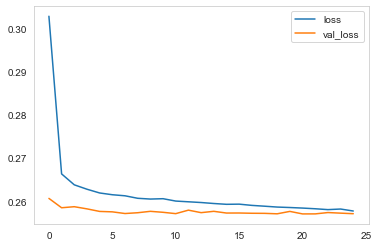

In [480]:
loss_df.plot()

In [481]:
from sklearn.metrics import classification_report, confusion_matrix

predictions= (model.predict(x_test)>0.5).astype("int32")
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [483]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.45      0.97      0.61      7130
           1       1.00      0.88      0.94     72076

    accuracy                           0.89     79206
   macro avg       0.72      0.93      0.77     79206
weighted avg       0.95      0.89      0.91     79206



In [484]:
confusion_matrix(predictions, y_test)

array([[ 6911,   219],
       [ 8484, 63592]], dtype=int64)

## new customer 

In [487]:
import random
random.seed(101)
random_ind = random.randint(0,len(data))

new_customer = data.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

verification_status_Source Verified       1.0
verification_status_Verified              0.0
application_type_INDIVIDUAL               1.0
application_type_JOINT                    0.0
initial_list_status_w                     0.0
                                        ...  
48052                                     0.0
70466                                     0.0
86630                                     0.0
93700                                     0.0
earliest_cr_year                       1991.0
Name: 304691, Length: 76, dtype: float64

In [494]:
prediction= (model.predict(new_customer.values.reshape(1,76))>0.5).astype("int32")
prediction

array([[1]])

In [495]:
data.iloc[random_ind]['loan_repaid']

1.0